

# Entornos de soporte al desarrollo de simulaciones: Simpy - Parte 2


## Generacion de graficar de atencion. 

En base a la simulacion anterior generar una grafica de los autos atendidos.

In [2]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 7 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 9
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(TIEMPO_LAVADO)
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))

        k=env.now
    if k in tiempo:
        tiempo[k]=tiempo[k]+1
    else:
        tiempo[k]=1
    
    
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


Lavanderia UPS
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Removido  {46%} suciedad vehiculo => Vehiculo-1 
Removido  {50%} suciedad vehiculo => Vehiculo-2 
Removido  {42%} suciedad vehiculo => Vehiculo-3 
Vehiculo [Vehiculo-1] lavado a las 7.00.
Vehiculo [Vehiculo-2] lavado a las 7.00.
Vehiculo [Vehiculo-3] lavado a las 7.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 7.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 7.00.
Llega vehiculo: Vehiculo-6 a la hora 12.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 12.00.
Removido  {42%} suciedad vehiculo => Vehiculo-4 
Removido  {82%} suciedad vehiculo => Vehiculo-5 
Vehiculo [Vehiculo-4] lavado a las 14.0

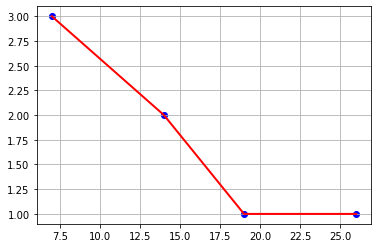

In [3]:
# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Paremetrizando la simulacion

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 20 minutos
    * Automóvil: 7 minutos
    * Furgoneta: 12 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Realice una gráfica de la simulación con 3 máquinas de lavado

Lavanderia UPS
Llega vehiculo: Bus-1 a la hora 0.00.
Llega vehiculo: Automovil-1 a la hora 0.00.
Llega vehiculo: Furgoneta-1 a la hora 0.00.
Llega vehiculo: Bus-2 a la hora 0.00.
Llega vehiculo: Automovil-2 a la hora 0.00.
Llega vehiculo: Furgoneta-2 a la hora 0.00.
Llega vehiculo: Bus-3 a la hora 0.00.
Llega vehiculo: Automovil-3 a la hora 0.00.
Llega vehiculo: Furgoneta-3 a la hora 0.00.
Llega vehiculo: Bus-4 a la hora 0.00.
Llega vehiculo: Automovil-4 a la hora 0.00.
Llega vehiculo: Furgoneta-4 a la hora 0.00.
Llega vehiculo: Bus-5 a la hora 0.00.
Llega vehiculo: Automovil-5 a la hora 0.00.
Llega vehiculo: Furgoneta-5 a la hora 0.00.
Se traslada vehiculo: Bus-1 a la hora 0.00.
Se traslada vehiculo: Automovil-1 a la hora 0.00.
Se traslada vehiculo: Furgoneta-1 a la hora 0.00.
Entra vehiculo a lavarse: Automovil-1 a la hora 1.00.
Entra vehiculo a lavarse: Furgoneta-1 a la hora 2.00.
Entra vehiculo a lavarse: Bus-1 a la hora 4.00.
Removido  {46%} suciedad vehiculo => Automovil-1 
Vehic

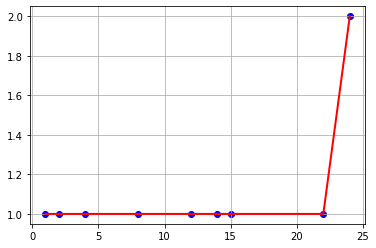

In [4]:
import simpy
import random
import matplotlib.pyplot as pp

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 9
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        
        automotor=vehiculo.split('-')
        
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TIEMPO_BUS)
            
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TIEMPO_AUTOMOVIL)
        
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TIEMPO_FURGONETA)
            
        k=env.now
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
            
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' \
              % (random.randint(30,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        
        automotor=vehiculo.split('-')
        
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO_BUS)
            
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO_AUTOMOVIL)
        
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO_FURGONETA)
        
        k=env.now
        if k in tiempo:
             tiempo[k]=tiempo[k]+1
        else:
             tiempo[k]=1
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        #Indicamos que el vehiculo se esta trasladando para ser lavado
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del vehiculo
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))

print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
                                TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
                                TRASLADO_FURGONETA, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Práctica  Sympy 2

En base a la simulacion del hospital, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Ecuador. Parametrizar la simulacion para ingresar el numero de pacientes, el porcentaje de cada edad, en numero de consultorios y el numero de camas o repiradores artificiales y algun otro parametro que considere oportuno.

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala (por tipo de paciente: niño, adolescente, adulto y adulto mayor).
- Tiempo promedio total que requiere un paciente para ser atendido desde cero (por cada tipo de paciente).
- Cuántos pacientes de cada tipo se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.

Finalmente generar las simulaciones para el pico de atencion de R0 calculado y R0 predecido la siguiente semana.

In [40]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline


#PARAMETROS
HOSPITALES = 11
HOSPITAL_CAMA_A = 256
HOSPITAL_Consultorios_A = 75
INFECTADOS = 565
TASA_CRECIMIENTO = 120
TIEMPO_consulta = 0.0105 #15 minutos 
DIAS_INTERNADO = 14
DIAS_SIMULACION = 20



#Diccionario para almacenar los resultados
persona_recuperadas={}
persona_fallecidas={}
tiempos_espera=[]
tiempos_espera_consulta=[]
paciente_no_atendido=[]
pacietnes_atendidos=[]



class Hospital(object):
    #constructor
    def __init__(self, env, num_cama,num_consultorios, name):
            self.env = env
            self.num_cama = num_cama
            self.num_consultorios=num_consultorios
            self.camas = simpy.Resource(env, num_cama)
            self.consultorios=simpy.Resource(env, num_consultorios)
            self.name = name
    def ingresar_sala(self,paciente):
        tiempo_consulta=random.uniform(TIEMPO_consulta-0.005, TIEMPO_consulta+0.005)
        yield self.env.timeout(tiempo_consulta)
        print('Tiempo de atender al paciente : ', tiempo_consulta*1440)
        tiempos_espera.append(tiempo_consulta)
        
    def ingresar_cama(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-14, DIAS_INTERNADO+14))
        print("El Paciente termino: ", paciente, " en un tiempo de salida: ", self.env.now, " hospital ", self.name)

def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    with hospital.consultorios.request() as consultorio:
        dias_esperando_consulta=random.randint(1,5)
        tiempos_espera_consulta.append(dias_esperando_consulta)
        requerimiento2 = yield consultorio | env.timeout(dias_esperando_consulta)
        wait2 = env.now - arrive
        if consultorio in requerimiento2:
            print("Al enfermo: ", paciente, " se le envia a la cama ", " del hospital " , hospital.name)
            yield env.process(hospital.ingresar_sala(paciente))
            estado = random.randint(1,100)
            pacietnes_atendidos.append(1)
            if(estado < 40):
                with hospital.camas.request() as cama:
                    arrive2 = env.now
                    dias_esperando = random.randint(1,5) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive2
                    if cama in requerimiento:
                        print("Al enfermo: ", paciente, " se le envia a la cama ", " del hospital " , hospital.name)
                        yield env.process(hospital.ingresar_cama(paciente))
                        estado = random.randint(1,100)
                        if (estado < 8) :
                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                        else:
                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1
                    else:
                        print("La persona " , paciente, " en el hospital ", hospital.name, " espero ", wait , " de dias y muere")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
            else :
                print("El paciente no tiene COVID-19 : ", paciente, " hospital ", hospital.name )
        else:
            print("La persona " , paciente, " en el hospital ", hospital.name, " espero ", wait2 , " dias y muere, no se le atendio")
            paciente_no_atendido.append(1)
            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
            
            
            
def ejecutar(env, tasa_crecimiento, infectados):
    hospitalA = Hospital(env, HOSPITAL_CAMA_A,HOSPITAL_Consultorios_A, "A")
    for i in range(infectados):
        asignar_hospital(env, hospitalA, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospitalA, paciente)
                
def asignar_hospital(env, hospitalA, paciente):
    hosp_esc = 1
    if (hosp_esc == 1):
        print("Ingresa nuevo persona: ", paciente, " hospital A tiempo ", env.now)
        env.process(llegada_paciente(env, hospitalA, paciente))

print("Simulacion COVID 19")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, INFECTADOS))
env.run(until=DIAS_SIMULACION)

print("Resulatdo de la Simulacion de Pacientes :")
print("Recuperados: ")
print(persona_recuperadas)




Simulacion COVID 19
Ingresa nuevo paciente :  0  hospital A tiempo  0
Ingresa nuevo paciente :  1  hospital A tiempo  0
Ingresa nuevo paciente :  2  hospital A tiempo  0
Ingresa nuevo paciente :  3  hospital A tiempo  0
Ingresa nuevo paciente :  4  hospital A tiempo  0
Ingresa nuevo paciente :  5  hospital A tiempo  0
Ingresa nuevo paciente :  6  hospital A tiempo  0
Ingresa nuevo paciente :  7  hospital A tiempo  0
Ingresa nuevo paciente :  8  hospital A tiempo  0
Ingresa nuevo paciente :  9  hospital A tiempo  0
Ingresa nuevo paciente :  10  hospital A tiempo  0
Ingresa nuevo paciente :  11  hospital A tiempo  0
Ingresa nuevo paciente :  12  hospital A tiempo  0
Ingresa nuevo paciente :  13  hospital A tiempo  0
Ingresa nuevo paciente :  14  hospital A tiempo  0
Ingresa nuevo paciente :  15  hospital A tiempo  0
Ingresa nuevo paciente :  16  hospital A tiempo  0
Ingresa nuevo paciente :  17  hospital A tiempo  0
Ingresa nuevo paciente :  18  hospital A tiempo  0
Ingresa nuevo pacient

Ingresa nuevo paciente :  481  hospital A tiempo  0
Ingresa nuevo paciente :  482  hospital A tiempo  0
Ingresa nuevo paciente :  483  hospital A tiempo  0
Ingresa nuevo paciente :  484  hospital A tiempo  0
Ingresa nuevo paciente :  485  hospital A tiempo  0
Ingresa nuevo paciente :  486  hospital A tiempo  0
Ingresa nuevo paciente :  487  hospital A tiempo  0
Ingresa nuevo paciente :  488  hospital A tiempo  0
Ingresa nuevo paciente :  489  hospital A tiempo  0
Ingresa nuevo paciente :  490  hospital A tiempo  0
Ingresa nuevo paciente :  491  hospital A tiempo  0
Ingresa nuevo paciente :  492  hospital A tiempo  0
Ingresa nuevo paciente :  493  hospital A tiempo  0
Ingresa nuevo paciente :  494  hospital A tiempo  0
Ingresa nuevo paciente :  495  hospital A tiempo  0
Ingresa nuevo paciente :  496  hospital A tiempo  0
Ingresa nuevo paciente :  497  hospital A tiempo  0
Ingresa nuevo paciente :  498  hospital A tiempo  0
Ingresa nuevo paciente :  499  hospital A tiempo  0
Ingresa nuev

Al enfermo:  73  se le envia a la cama   del hospital  A
Tiempo de atender al paciente :  10.241025148239219
Al enfermo:  84  se le envia a la cama   del hospital  A
Tiempo de atender al paciente :  9.0343145926308
El paciente no tiene COVID-19 :  90  hospital  A
Al enfermo:  119  se le envia a la cama   del hospital  A
Tiempo de atender al paciente :  21.37210322644601
Al enfermo:  67  se le envia a la cama   del hospital  A
Tiempo de atender al paciente :  9.49516000477743
El paciente no tiene COVID-19 :  88  hospital  A
Al enfermo:  120  se le envia a la cama   del hospital  A
Tiempo de atender al paciente :  21.55774521185717
El paciente no tiene COVID-19 :  66  hospital  A
Al enfermo:  121  se le envia a la cama   del hospital  A
Tiempo de atender al paciente :  21.64575383384536
Al enfermo:  68  se le envia a la cama   del hospital  A
Tiempo de atender al paciente :  13.447623614136857
Al enfermo:  75  se le envia a la cama   del hospital  A
Tiempo de atender al paciente :  22.07

Ingresa nuevo paciente :  677  hospital A tiempo  1
Ingresa nuevo paciente :  678  hospital A tiempo  1
Ingresa nuevo paciente :  679  hospital A tiempo  1
Ingresa nuevo paciente :  680  hospital A tiempo  1
Ingresa nuevo paciente :  681  hospital A tiempo  1
Ingresa nuevo paciente :  682  hospital A tiempo  1
Ingresa nuevo paciente :  683  hospital A tiempo  1
Ingresa nuevo paciente :  684  hospital A tiempo  1
Ingresa nuevo paciente :  685  hospital A tiempo  1
La persona  184  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  186  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  187  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  190  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  195  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  196  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  205  en el hospital  A  espero  1  dias y muere, no 

La persona  304  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  305  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  310  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  311  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  320  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  324  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  327  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  328  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  333  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  344  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  347  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  351  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  352  en el hospital  A  espero  2  dias y muere, no 

La persona  629  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  633  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  646  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  647  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  649  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  650  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  651  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  652  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  655  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  665  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  671  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  677  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  679  en el hospital  A  espero  2  dias y muere, no 

La persona  790  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  792  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  799  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  804  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  805  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  807  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  811  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  812  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  815  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  816  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  820  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  831  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  832  en el hospital  A  espero  1  dias y muere, no 

La persona  584  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  585  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  596  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  598  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  599  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  605  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  615  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  619  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  624  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  627  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  635  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  638  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  653  en el hospital  A  espero  4  dias y muere, no 

La persona  778  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  788  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  789  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  794  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  796  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  801  en el hospital  A  espero  4  dias y muere, no se le atendio
La persona  829  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  839  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  840  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  843  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  849  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  850  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  860  en el hospital  A  espero  3  dias y muere, no 

La persona  1053  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1057  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1058  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1062  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1063  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1066  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1077  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1080  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1081  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1085  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1086  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1087  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1095  en el hospital  A  espero  2  dias

La persona  1395  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1396  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1405  en el hospital  A  espero  1  dias y muere, no se le atendio
El Paciente termino:  21  en un tiempo de salida:  8.010610218553815  hospital  A
Al enfermo:  926  se le envia a la cama   del hospital  A
El Paciente termino:  69  en un tiempo de salida:  8.013738940956344  hospital  A
Al enfermo:  932  se le envia a la cama   del hospital  A
El Paciente termino:  80  en un tiempo de salida:  8.013880083910061  hospital  A
Al enfermo:  946  se le envia a la cama   del hospital  A
Tiempo de atender al paciente :  11.496811563288052
El paciente no tiene COVID-19 :  926  hospital  A
Al enfermo:  950  se le envia a la cama   del hospital  A
Tiempo de atender al paciente :  12.724067436405184
Al enfermo:  946  se le envia a la cama   del hospital  A
Tiempo de atender al paciente :  17.64611801696055
El paciente no tiene C

La persona  1404  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1415  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1416  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1422  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1425  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1435  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1445  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1448  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1450  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1451  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1453  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1455  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1459  en el hospital  A  espero  1  dias

La persona  1391  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1393  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1402  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1403  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1410  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1411  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1413  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1418  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1419  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1428  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1430  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1438  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  1439  en el hospital  A  espero  2  dias

La persona  1465  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1472  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1477  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1478  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1485  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1489  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1494  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1497  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1502  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1510  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1524  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1525  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  1549  en el hospital  A  espero  2  dias

La persona  1857  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1861  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1863  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1866  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1867  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1872  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1875  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1876  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1878  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1885  en el hospital  A  espero  1  dias y muere, no se le atendio
El Paciente termino:  55  en un tiempo de salida:  12.010361363167442  hospital  A
Al enfermo:  1406  se le envia a la cama   del hospital  A
El Paciente termino:  12  en un tiempo de salida:  12.01422867103300

La persona  1910  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1935  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1941  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1953  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1959  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1962  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1964  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1965  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1968  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1982  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1986  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1987  en el hospital  A  espero  1  dias y muere, no se le atendio
La persona  1992  en el hospital  A  espero  1  dias

Ingresa nuevo paciente :  2336  hospital A tiempo  15
Ingresa nuevo paciente :  2337  hospital A tiempo  15
Ingresa nuevo paciente :  2338  hospital A tiempo  15
Ingresa nuevo paciente :  2339  hospital A tiempo  15
Ingresa nuevo paciente :  2340  hospital A tiempo  15
Ingresa nuevo paciente :  2341  hospital A tiempo  15
Ingresa nuevo paciente :  2342  hospital A tiempo  15
Ingresa nuevo paciente :  2343  hospital A tiempo  15
Ingresa nuevo paciente :  2344  hospital A tiempo  15
Ingresa nuevo paciente :  2345  hospital A tiempo  15
Ingresa nuevo paciente :  2346  hospital A tiempo  15
Ingresa nuevo paciente :  2347  hospital A tiempo  15
Ingresa nuevo paciente :  2348  hospital A tiempo  15
Ingresa nuevo paciente :  2349  hospital A tiempo  15
Ingresa nuevo paciente :  2350  hospital A tiempo  15
Ingresa nuevo paciente :  2351  hospital A tiempo  15
Ingresa nuevo paciente :  2352  hospital A tiempo  15
Ingresa nuevo paciente :  2353  hospital A tiempo  15
Ingresa nuevo paciente :  23

Ingresa nuevo paciente :  2454  hospital A tiempo  16
Ingresa nuevo paciente :  2455  hospital A tiempo  16
Ingresa nuevo paciente :  2456  hospital A tiempo  16
Ingresa nuevo paciente :  2457  hospital A tiempo  16
Ingresa nuevo paciente :  2458  hospital A tiempo  16
Ingresa nuevo paciente :  2459  hospital A tiempo  16
Ingresa nuevo paciente :  2460  hospital A tiempo  16
Ingresa nuevo paciente :  2461  hospital A tiempo  16
Ingresa nuevo paciente :  2462  hospital A tiempo  16
Ingresa nuevo paciente :  2463  hospital A tiempo  16
Ingresa nuevo paciente :  2464  hospital A tiempo  16
Ingresa nuevo paciente :  2465  hospital A tiempo  16
Ingresa nuevo paciente :  2466  hospital A tiempo  16
Ingresa nuevo paciente :  2467  hospital A tiempo  16
Ingresa nuevo paciente :  2468  hospital A tiempo  16
Ingresa nuevo paciente :  2469  hospital A tiempo  16
Ingresa nuevo paciente :  2470  hospital A tiempo  16
Ingresa nuevo paciente :  2471  hospital A tiempo  16
Ingresa nuevo paciente :  24

Ingresa nuevo paciente :  2604  hospital A tiempo  17
Ingresa nuevo paciente :  2605  hospital A tiempo  17
La persona  1920  en el hospital  A  espero  5  dias y muere, no se le atendio
La persona  1922  en el hospital  A  espero  5  dias y muere, no se le atendio
La persona  1925  en el hospital  A  espero  5  dias y muere, no se le atendio
La persona  1927  en el hospital  A  espero  5  dias y muere, no se le atendio
La persona  1928  en el hospital  A  espero  5  dias y muere, no se le atendio
La persona  1929  en el hospital  A  espero  5  dias y muere, no se le atendio
La persona  1930  en el hospital  A  espero  5  dias y muere, no se le atendio
La persona  1934  en el hospital  A  espero  5  dias y muere, no se le atendio
La persona  1942  en el hospital  A  espero  5  dias y muere, no se le atendio
La persona  1943  en el hospital  A  espero  5  dias y muere, no se le atendio
La persona  1944  en el hospital  A  espero  5  dias y muere, no se le atendio
La persona  1945  en el

La persona  2426  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2430  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2441  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2442  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2445  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2448  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2450  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2461  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2463  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2471  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2472  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2484  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2486  en el hospital  A  espero  1  dias

La persona  2470  en el hospital  A  espero  3  dias y muere, no se le atendio
La persona  2487  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2489  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2492  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2493  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2496  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2503  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2507  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2511  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2512  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2519  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2529  en el hospital  A  espero  2  dias y muere, no se le atendio
La persona  2531  en el hospital  A  espero  2  dias

Fallecidos: 
{1: 67, 2: 98, 3: 127, 4: 138, 5: 141, 5.027012249284792: 1, 6: 102, 7: 124, 8: 108, 9: 114, 10: 91, 11: 123, 12: 126, 13: 106, 14: 116, 15: 111, 16: 117, 17: 97, 18: 104, 19: 124}


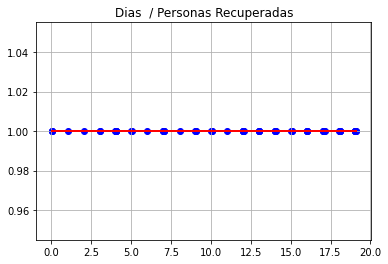

In [34]:
print("Fallecidos: ")
print(persona_fallecidas)

datos=sorted(persona_recuperadas.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Dias  / Personas Recuperadas")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

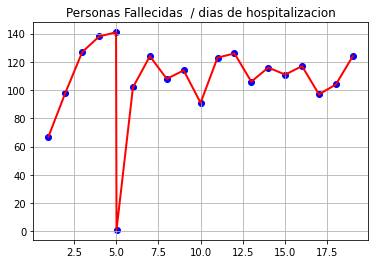

In [35]:
if (persona_fallecidas):
    datos=sorted(persona_fallecidas.items()) # Ordenamos los datos
    x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
    pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
    pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
    pp.title("Personas Fallecidas  / dias de hospitalizacion")
    pp.grid(True) #Generamos una cuadricula
    pp.show() #Mostramos el grafico


In [36]:
print("Tiempo de espera promedio para cada sala.")
print("Timepos de espera: ",sum(tiempos_espera)/len(tiempos_espera))
print("Tiempo promedio total que requiere un paciente para ser atendido desde cero")
print(sum(tiempos_espera_consulta)/len(tiempos_espera_consulta))
print("Cuántos pacientes se atendieron.")
print(sum(pacietnes_atendidos))
print("Cuántos pacientes se quedaron sin atender y fallecieron.")
print(sum(paciente_no_atendido))

Tiempo de espera promedio para cada sala.
Timepos de espera:  0.010643670584400933
Tiempo promedio total que requiere un paciente para ser atendido desde cero
3.022847100175747
Cuántos pacientes se atendieron.
371
Cuántos pacientes se quedaron sin atender y fallecieron.
2134


## Referencias
[1] Matloff, N. (2008). Introduction to Discrete-Event Simulation and the SimPy Language.

[2] Team Simpy (2017). SimPy Documentation, Release 3.0.10, 2017. URL: https://media.readthedocs.org/pdf/simpy/latest/simpy.pdf 